In [1]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=(10, 3))
import math
from IPython.display import Audio
from IPython.display import display, Markdown

In [4]:
sourceFilesPrefix="SamplesFromPaper//s"
rate2, sample2_data = scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")
rate3, sample3_data = scipy.io.wavfile.read(sourceFilesPrefix+"3.wav")
rate4, sample4_data = scipy.io.wavfile.read(sourceFilesPrefix+"4.wav")

In [5]:
def sigmoid(y):
    g=np.divide(1,np.add(1,np.exp(-y)))
    return g

def gradient(eta, Y, W):
    delW=np.zeros(W.shape)
    Z=sigmoid(Y)
    Id=np.identity(Y.shape[0])
    grad=eta*(Id+np.dot((1-2*Z),Y.T))*W
    return grad

# First input signal \( vacuum cleaner \)

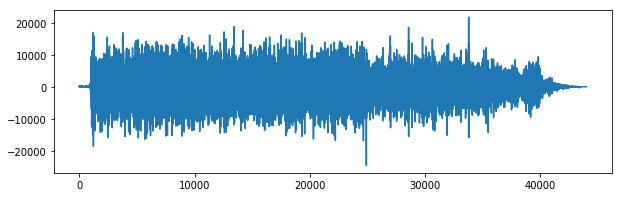

In [6]:
display(Markdown("# First input signal \( vacuum cleaner \)"))
plt.figure(1)
plt.plot(sample2_data)
plt.show()
Audio(data=sample2_data, rate=16000)

# Second input signal \( clapping \)

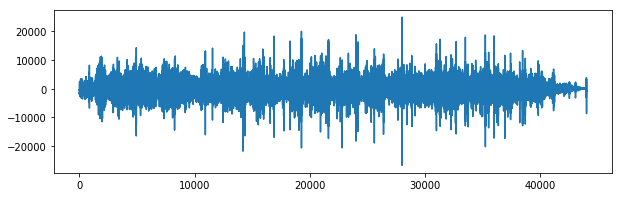

In [7]:
display(Markdown("# Second input signal \( clapping \)"))
plt.figure(1)
plt.plot(sample3_data)
plt.show()
Audio(data=sample3_data, rate=16000)

# Third input signal \( laughter \)

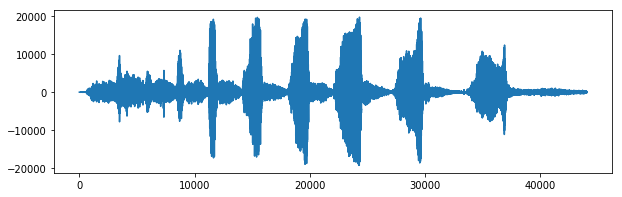

In [8]:
display(Markdown("# Third input signal \( laughter \)"))
plt.figure(1)
plt.plot(sample4_data)
plt.show()
Audio(data=sample4_data, rate=16000)

In [9]:
# Whiten the data
med2=sample2_data.std(axis=0)
s2data=sample2_data/med2
med3=sample3_data.std(axis=0)
s3data=sample3_data/med3
med4=sample4_data.std(axis=0)
s4data=sample4_data/med4

orig=np.matrix([s2data,s3data,s4data])
n=len(orig)
A=np.random.random([n,n])
A=np.matrix([[0.77191,0.47520,0.58699],
             [0.33712,0.47563,0.20836],
             [0.96878,0.57618,0.65625]])
#A=np.matrix([[0.64755676,0.100196,0.19218686],
#             [0.93964661,0.67266693,0.72717433],
#             [0.40761486,0.8382480,0.15386914]])
print("Mixing matrix: \n"+str(A))
X=np.dot(A,orig)

Mixing matrix: 
[[ 0.77191  0.4752   0.58699]
 [ 0.33712  0.47563  0.20836]
 [ 0.96878  0.57618  0.65625]]


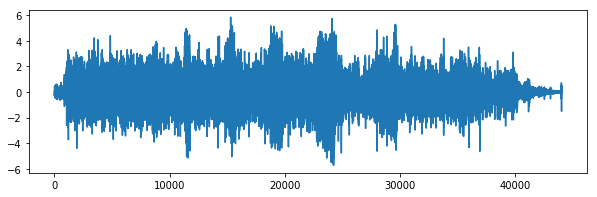

In [10]:
plt.figure(1)
plt.plot(X[0].T)
plt.show()
Audio(data=X[0], rate=16000)

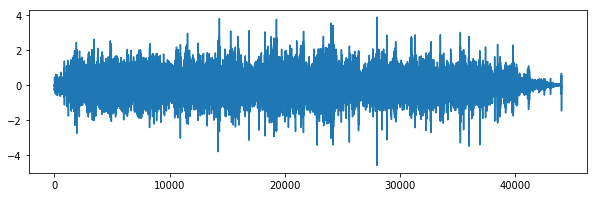

In [11]:
plt.figure(2)
plt.plot(X[1].T)
plt.show()
Audio(data=X[1], rate=16000)

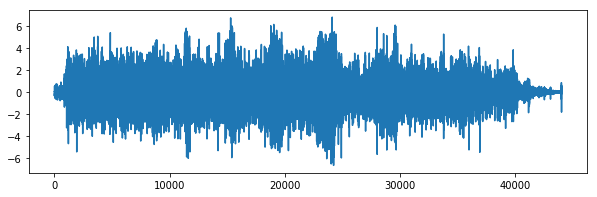

In [12]:
plt.figure(3)
plt.plot(X[2].T)
plt.show()
Audio(data=X[2], rate=16000)

In [13]:
eta=0.01
eta0=eta
T=1000
num_iter=10000

W=np.random.random([n,n])/100
print("Initial guessed decomposition matrix: \n"+str(W))
for i in range(0,num_iter):
    Y=np.dot(W,X)
    delW=gradient(eta,Y,W)
    aux=W+delW
    W=aux
    eta=eta0/(1+(i/T))

Initial guessed decomposition matrix: 
[[ 0.00821161  0.0022583   0.00638868]
 [ 0.00334757  0.00114013  0.00700225]
 [ 0.00068659  0.00054835  0.00441006]]


In [14]:
print("Final guessed decomposition matrix: \n"+str(W))

Final guessed decomposition matrix: 
[[ 0.05711669  0.01401768 -0.04936816]
 [-0.01694972 -0.02164545  0.02639229]
 [-0.11339444  0.00706728  0.09221864]]


In [15]:
# RECOVERED SIGNALS MATRIX
Y=np.dot(W,X)
#Y = (Y - Y.min()) / (Y.max() - Y.min());
Y2=Y*2

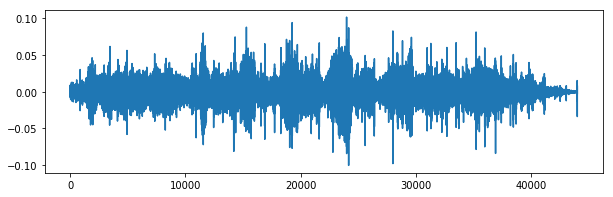

In [16]:
# FIRST RECOVERED SIGNAL
plt.figure(1)
plt.plot(Y2[0].T)
plt.show()
Audio(data=Y2[0], rate=16000)

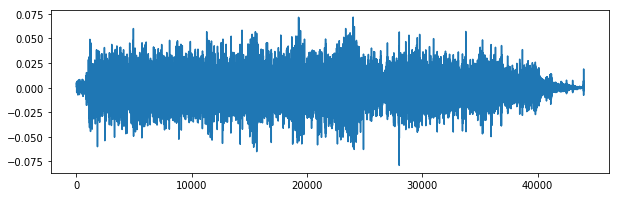

In [17]:
# SECOND RECOVERED SIGNAL
plt.figure(1)
plt.plot(Y2[1].T)
plt.show()
Audio(data=Y2[1], rate=16000)

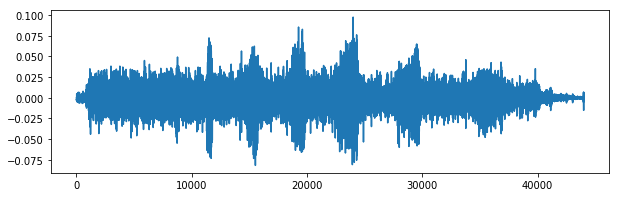

In [18]:
# THIRD RECOVERED SIGNAL
plt.figure(1)
plt.plot(Y2[2].T)
plt.show()
Audio(data=Y2[2], rate=16000)